# Дисциплина: Методы машинного обучения
# Лабораторная работа №2 "Обработка признаков (часть 1)"
# Выполнил: Грунин Н. С. ИУ5-24М

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('laptop.csv')
data.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [3]:
data.dtypes

Unnamed: 0              int64
Brand                  object
Model                  object
Series                 object
Processor              object
Processor_Gen          object
RAM                   float64
Hard_Disk_Capacity     object
OS                     object
Rating                float64
Price                   int64
dtype: object

In [4]:
data.isnull().sum()

Unnamed: 0             0
Brand                  0
Model                 14
Series                50
Processor              7
Processor_Gen          7
RAM                    8
Hard_Disk_Capacity     8
OS                     8
Rating                 0
Price                  0
dtype: int64

In [15]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):

    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,))

Series_Data=data['Series']
OS_Data=data['OS']
Rating_Data=data['Rating']
Series_name=impute_column(data, 'Series', 'constant', fill_value_param='No_Series')
OS_name=impute_column(data, 'OS', 'constant', fill_value_param='No_OS')
Rating_name=impute_column(data, 'Rating', 'constant', fill_value_param=0)
data['Series']=Series_name
data['OS']=OS_name
data['Rating']=Rating_name
data.isnull().sum()

Unnamed: 0            0
Brand                 0
Model                 0
Series                0
Processor             0
Processor_Gen         7
RAM                   8
Hard_Disk_Capacity    8
OS                    0
Rating                0
Price                 0
dtype: int64

In [17]:
data[data.Series == 'No_Series']

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,No_Series,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,No_Series,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
3,3,DELL,Inspiron,No_Series,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
7,7,DELL,Inspiron,No_Series,i5,11th,16.0,512 GB SSD,Windows 10,4.2,69040
9,9,HP,No_Model,No_Series,i5,11th,8.0,512 GB SSD,Windows 11 Home,4.4,56449
10,10,HP,No_Model,No_Series,i3,11th,8.0,512 GB SSD,Windows 11 Home,4.3,42440
17,17,Lenovo,No_Model,No_Series,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,62140
20,20,ASUS,No_Model,No_Series,i3,11th,8.0,256 GB SSD,Windows 11 Home,4.4,38940
21,21,HP,No_Model,No_Series,i3,10th,8.0,512 GB SSD,Windows 10 Home,4.3,42340
25,25,DELL,Inspiron,No_Series,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040


In [10]:
data[data.OS == 'No_OS']

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
45,45,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,No_OS,4.7,84940
70,70,DELL,Vostro,Ryzen,R3-3250U,-,NaN,NaN,No_OS,3.9,37340
75,75,APPLE,MacBook,Air,NaN,NaN,NaN,NaN,No_OS,4.5,119940
81,81,APPLE,MacBook,Air,NaN,NaN,NaN,NaN,No_OS,4.5,105940
87,87,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,No_OS,4.7,110940
88,88,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,No_OS,4.6,129990
90,90,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,No_OS,4.6,129990
120,120,APPLE,MacBook,Air,NaN,NaN,NaN,NaN,No_OS,4.5,119940


In [21]:
data[data.Rating < 3]

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
123,123,DELL,No_Model,No_Series,i3,10th,8.0,1 TB HDD,256 GB SSD,2.9,46840
128,128,ASUS,Vivobook,15,i3,11th,8.0,1 TB HDD,Windows 10 Home,2.9,42750


In [22]:
data = pd.read_csv('laptop.csv')

In [23]:
pd.get_dummies(data[['Series']]).head()

,Series_(Slim),Series_14,Series_15,Series_3,Series_3405,Series_5,Series_530s,Series_7,Series_Air,Series_Athlon,...,Series_Macbook,Series_PC,Series_Pavilion,Series_Ryzen,Series_Slim,Series_Strix,Series_TUF,Series_Thin,Series_Ultra,Series_Zephyrus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
pd.get_dummies(data[['Series']], dummy_na=True).head()

,Series_(Slim),Series_14,Series_15,Series_3,Series_3405,Series_5,Series_530s,Series_7,Series_Air,Series_Athlon,...,Series_PC,Series_Pavilion,Series_Ryzen,Series_Slim,Series_Strix,Series_TUF,Series_Thin,Series_Ultra,Series_Zephyrus,Series_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
date = LabelEncoder()
date_transform = date.fit_transform(data['Rating'])

In [26]:
data['Rating'].unique()

array([3.7, 3.6, 4.3, 4.4, 4.5, 4.2, 4.1, 4.8, 4. , 4.7, 4.6, 3.9, 3.4,
       2.9, 3.2, 3.1])

In [27]:
np.unique(date_transform)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [28]:
data = pd.read_csv('laptop.csv')
data.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [29]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

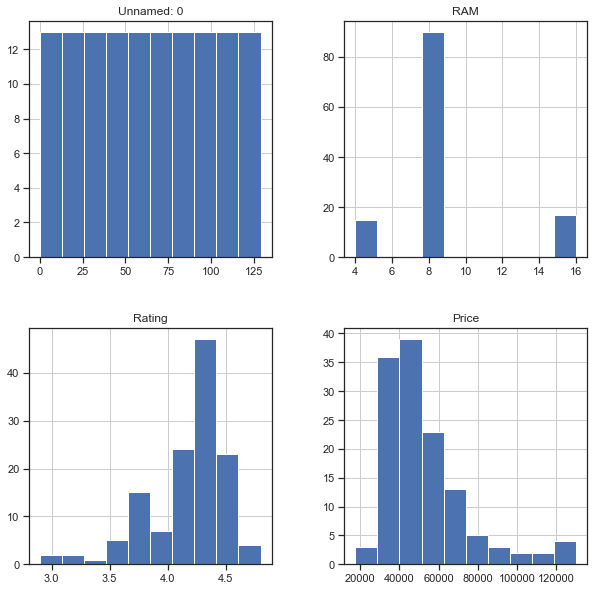

In [30]:
data.hist(figsize=(10,10))
plt.show()

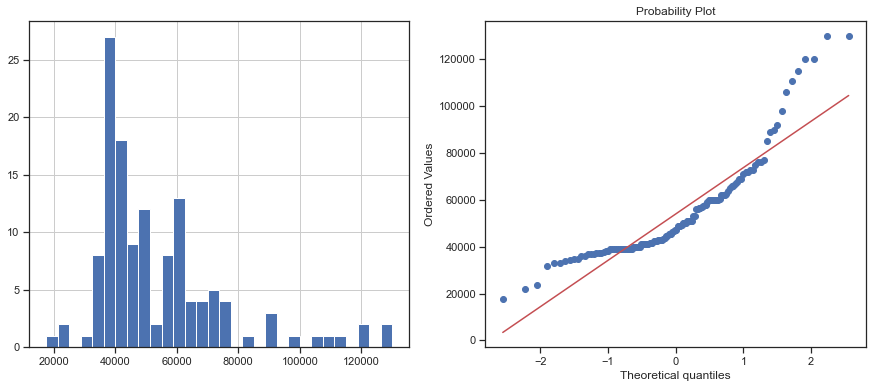

In [32]:
diagnostic_plots(data, 'Price')

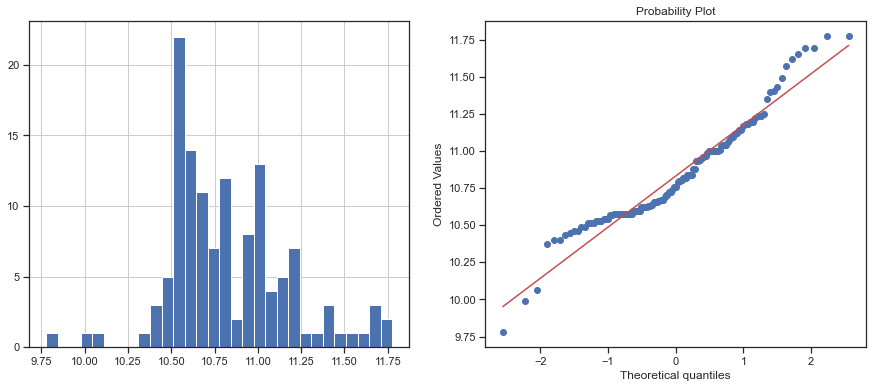

In [33]:
data['GrLivArea_log'] = np.log(data['Price'])
diagnostic_plots(data, 'GrLivArea_log')

Оптимальное значение λ = -0.3787072173825213


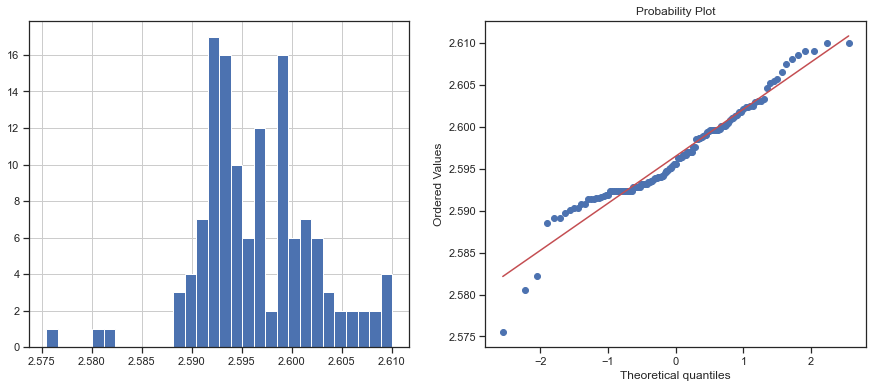

In [34]:
data['GrLivArea_boxcox'], param = stats.boxcox(data['Price']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'GrLivArea_boxcox')